In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score
import itertools
from ucimlrepo import fetch_ucirepo 

import torch
from torch.optim import Adam
import torch.nn as nn

from data_transform import linear_transform

In [5]:
# fetch dataset 
poker_hand = fetch_ucirepo(id=158) 
  
# data (as pandas dataframes) 
X = poker_hand.data.features 
y = poker_hand.data.targets 
  
# metadata 
print(poker_hand.metadata) 
  
# variable information 
print(poker_hand.variables) 


{'uci_id': 158, 'name': 'Poker Hand', 'repository_url': 'https://archive.ics.uci.edu/dataset/158/poker+hand', 'data_url': 'https://archive.ics.uci.edu/static/public/158/data.csv', 'abstract': 'Purpose is to predict poker hands', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1025010, 'num_features': 10, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['CLASS'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2002, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5KW38', 'creators': ['Robert Cattral', 'Franz Oppacher'], 'intro_paper': None, 'additional_info': {'summary': 'Each record is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. There is one Class attribute that describes the "Poker Hand". T

### Transformation linéaire de la donnée 
---

On essaye ici d'appliquer la transformation linéaire discutée dans l'article [Poker Hand Dataset- A Machine Learning Analysis and a Practical Linear Transformation](#file:Poker%20Hand%20Dataset-%20A%20Machine%20Learning%20Analysis%20and%20a%20Practical%20Linear%20Transformation%20.pdf-context)

Cette transformation vise à réduire la dépendance à l'ordre des cartes : 
- les attributs de 1 à 13 représentent le nombre de cartes de chaque rang, de l'As (1) au Roi (13)
- les attributs de 14 à 17 représentent le nombre de cartes de chaque couleur (14 : Coeur, 15 : Pique, 16 : Carreau, 17 : Trèfle)
- Le 18ème attribut est inchangé, il s'agit de la classification de la main et c'est l'output qu'on cherche à prédire




In [32]:
transformed_data = linear_transform(X)

### Réseau de neurones 

---

Dans cette partie on utilisera un MLP (multi-layer perceptron) pour classifier les données. On commencera arbitrairement par un MLP à 3 couches (1 output et 2 hidden layers), la couche d'entrée aura 10 neurones car il y a 10 features, celle de sortie aura aussi 10 neurones car il y a 10 classes possibles. Les couches cachées auront chacune 10 neurones.

In [25]:
import torch
from torch.optim import Adam
from sklearn.model_selection import train_test_split

import torch.nn as nn

# Assuming X and y are already defined as pandas DataFrames
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert pandas DataFrames to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).squeeze()
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).squeeze()

# Define the neural network model
model = nn.Sequential(
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.Softmax(dim=1)
)

# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.01)

# Training loop
model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')
    loss.backward()
    optimizer.step()

Epoch 1, Loss: 2.2959351539611816
Epoch 2, Loss: 2.284050941467285
Epoch 3, Loss: 2.2687785625457764
Epoch 4, Loss: 2.249174118041992
Epoch 5, Loss: 2.2244341373443604
Epoch 6, Loss: 2.193398952484131
Epoch 7, Loss: 2.1559598445892334
Epoch 8, Loss: 2.1139373779296875
Epoch 9, Loss: 2.071601390838623
Epoch 10, Loss: 2.03487229347229
Epoch 11, Loss: 2.0084621906280518
Epoch 12, Loss: 1.9925180673599243
Epoch 13, Loss: 1.9825080633163452
Epoch 14, Loss: 1.973687767982483
Epoch 15, Loss: 1.9645153284072876
Epoch 16, Loss: 1.956682562828064
Epoch 17, Loss: 1.9526525735855103
Epoch 18, Loss: 1.9522968530654907
Epoch 19, Loss: 1.9535549879074097
Epoch 20, Loss: 1.9549987316131592
Epoch 21, Loss: 1.9561679363250732
Epoch 22, Loss: 1.9570238590240479
Epoch 23, Loss: 1.9576318264007568
Epoch 24, Loss: 1.9580632448196411
Epoch 25, Loss: 1.9583723545074463
Epoch 26, Loss: 1.9585973024368286
Epoch 27, Loss: 1.9587633609771729
Epoch 28, Loss: 1.9588874578475952
Epoch 29, Loss: 1.958981990814209
Epo

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.95      0.70    102428
           1       0.61      0.20      0.30     86945
           2       0.00      0.00      0.00      9691
           3       0.00      0.00      0.00      4352
           4       0.00      0.00      0.00       808
           5       0.00      0.00      0.00       405
           6       0.00      0.00      0.00       308
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2

    accuracy                           0.56    205002
   macro avg       0.12      0.11      0.10    205002
weighted avg       0.53      0.56      0.48    205002



/Users/clovispiedallu/Desktop/DAML_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clovispiedallu/Desktop/DAML_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clovispiedallu/Desktop/DAML_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

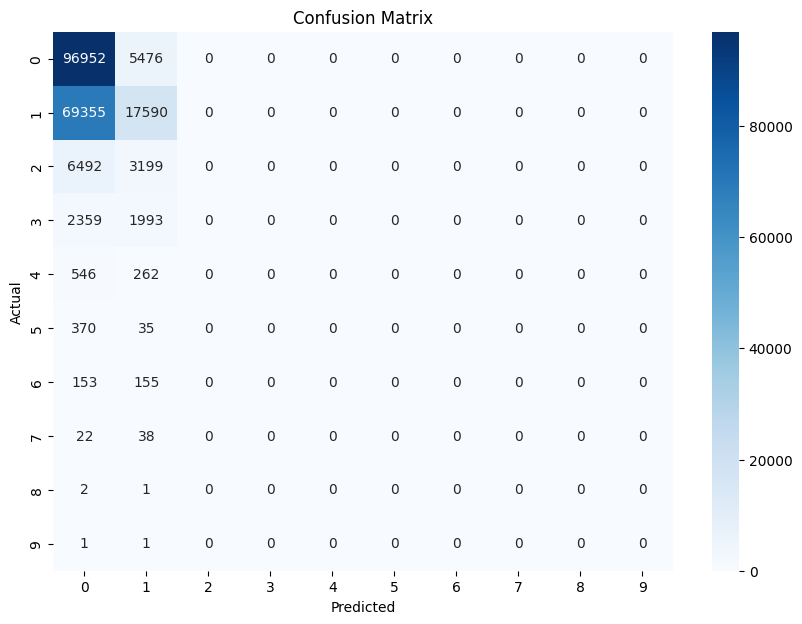

In [28]:
# Evaluation
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    y_test_pred_classes = torch.argmax(y_test_pred, dim=1)

# Generate classification report
report = classification_report(y_test_tensor, y_test_pred_classes)
print(f'Classification Report:\n{report}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_tensor, y_test_pred_classes)


# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()